## From ROOT TTree to Pandas Dataframe

As a senior graduate student in experimental particle physics, I've spent years without [numpy](http://www.numpy.org/), without [R](https://www.r-project.org/), even without [MATLAB](http://www.mathworks.com/products/matlab/)... instead, I've used [ROOT](https://root.cern.ch) like all of my peers. In the past year or so, as I've all but decided that I don't want to stay in physics, I've started using numpy and pandas to do my analysis. Turns out, python is _awesome_ and all of my years spent becoming familiar with ROOT have not been for naught, as there are remarkable similarities between ROOT and the python tools. 

One of the most powerful tools for exploring a data set in ROOT is the "TTree". TTrees are collections of variables (or even abstract objects), where each variable is an independent "branch". A TTree is often structured as having one entry (row) per "event" (since ROOT was the child of a bunch of particle physicists at CERN). One of the most useful parts of the TTree is that it has a "Draw" command, which automatically produces plots, with whatever cuts you want. For example, myTTree->Draw("myvar","myvar2 < 0.5") would produce an automatically binned histogram of "myvar" values that occur in TTree entries in which "myvar2 < 0.5". This is directly analogous to doing the following on a Pandas dataframe: mydf.query("myvar2 < 0.5").hist(myvar).

My favorite form of the TTree::Draw command is when you hand it two variables and ask for the correlations inbetween. Following the previous example, myTTree->Draw("myvar:myvar2") would created a 2D binned histogram showing the correlation between "myvar" and "myvar2". It didn't take much googling to figure out the analogous pandas dataframe command. Have a look for yourself at the following example:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Create an array of random x values, and y values are sin of x values w/ some spread
x = np.random.randn(100000)
y = np.sin(x)+np.random.normal(0,0.1,len(x))

In [3]:
#Put the x- and y- arrays into a dataframe as columns
#(I do it here by creating a dictionary to hand the DataFrame constructor)
df = pd.DataFrame( { 'x':x, 'y':y } )

In [4]:
#Just to show what the dataframe looks like...
df.head()

,x,y
0,-1.056886,-0.922644
1,-1.327892,-0.918329
2,0.187386,0.192160
3,-1.794735,-0.716124
4,-0.738857,-0.521622


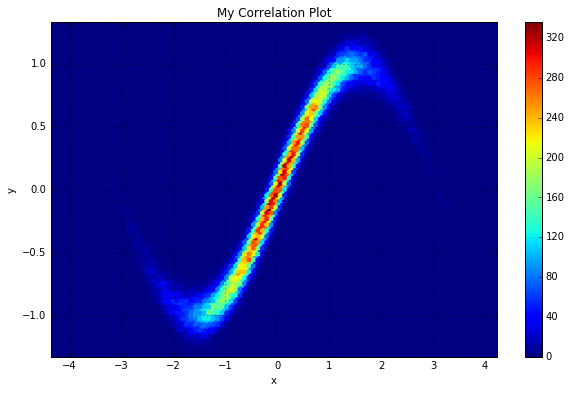

In [5]:
#The pandas "plot" command. Give it two columns of a dataframe to compare.
#The cells are hexagons, not squares, interestingly...
#'gridsize' is the number of bins along one axis
myplot = df.plot(x='x',y='y',
                 kind='hexbin',
                 figsize=[10,6],
                 title='My Correlation Plot',
                 colormap='jet',
                 gridsize=100)

Pretty cool, huh? This is a really quick way to look and see if two variables are qualitatively related to one another. A glance at a plot like this can often lead to new understanding of your dataset.